# **Titanic - Machine Learning from Disaster**

---

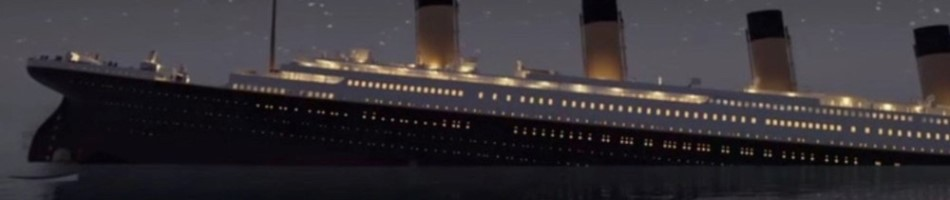

Vamos utilizar o <a href="https://www.kaggle.com/competitions/titanic/data?select=gender_submission.csv">dataset disponível no Kaggle</a>
- Ele é usado para competição.
- Classificação tipo binária.

In [146]:
# Importando a base
import pandas as pd
arquivo = '/content/drive/MyDrive/titanic_competition/titanic_train.csv'
arquivo2 = '/content/drive/MyDrive/titanic_competition/titanic_test.csv'

treino = pd.read_csv(arquivo)
teste = pd.read_csv(arquivo2)

In [147]:
# Visualizando a base
treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [148]:
# Verificando informações
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [149]:
# Somando e ordenando valores vazios em cada coluna
treino.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

## Analisando os valores presentes na base de teste:

In [150]:
# Observando as informações
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [151]:
# Somando e ordenando os valores vazios
teste.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

- Existem colunas com valores vazios na base de treino, que não estão vazios na base de teste, e vice-versa.

In [152]:
# Verificando o tipo dos dados
teste.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

## Inicio dos tratamentos genéricos e simplificado dos dados.

In [153]:
# Observando novamente valores vazios
treino.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

- Não será feito o tratamento dos valores vazios das colunas 'Cabin' e 'Embarked' na primeira Etapa, pois removeremos posteriormente todas as colunas categóricas.
- Trataremos apenas as colunas do tipo numéricas que possuem valores nulos.

In [154]:
# Obtendo o valor da média da coluna 'Age
treino.Age.mean()

29.69911764705882

In [155]:
# Substituindo os valores vazios pela média
treino.loc[treino.Age.isnull(), 'Age'] = treino.Age.mean()

- Agora podemos tratar as colunas da base de teste

In [156]:
# Visualizando novamente os valores vazios
teste.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [157]:
# Substituindo os valores vazios da coluna 'Age'
teste.loc[teste.Age.isnull(), 'Age'] = teste.Age.mean()

In [158]:
# Média da coluna 'Fare'
teste.Fare.mean()

35.627188489208635

In [159]:
# Tratando o valor nulo da coluna 'Fare'
teste.loc[teste.Fare.isnull(), 'Fare'] = teste.Fare.mean()

## Nesse momento, vamos considerar os dados que serão submetidos ao modelo
- Removeremos as colunas com alta cardinalidade, que pode prejudicar a capacidade de generalização do modelo:

In [160]:
# Analisando a cardinalidade da base
treino.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             89
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [161]:
# Removendo colunas da base de treino
treino = treino.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [162]:
# Para a base de teste
teste = teste.drop(['Name', 'Ticket', 'Cabin'], axis=1)
teste.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S


- Considerando apenas as colunas numéricas:

In [163]:
# Obtendo o nome das colunas numéricas
cols_nmr = treino.columns[treino.dtypes != 'object']
cols_nmr

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [164]:
# Pegando da base, essas colunas
treino_nmr = treino.loc[:, cols_nmr]
treino_nmr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [165]:
# Agora para a base de teste
cols_nmr_teste = teste.columns[teste.dtypes != 'object']
cols_nmr_teste

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [166]:
# Filtrando
teste_nmr = teste.loc[:, cols_nmr_teste]
teste_nmr

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.50000,0,0,7.8292
1,893,3,47.00000,1,0,7.0000
2,894,2,62.00000,0,0,9.6875
3,895,3,27.00000,0,0,8.6625
4,896,3,22.00000,1,1,12.2875
...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500
414,1306,1,39.00000,0,0,108.9000
415,1307,3,38.50000,0,0,7.2500
416,1308,3,30.27259,0,0,8.0500


## Trabalharemos com 3 modelos de Classificação diferentes.
**Utilizaremos os valores padrões de cada modelo**
- Árvore de Decisão (Classificação):<br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


- KNN(Classificação dos vizinhos mais próximos):<br>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Regressão Logística:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
<br>

### Vamos separar a base em treino e validação
- Será usado o **train_test_split:** <br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [167]:
# Separando X e y
X = treino_nmr.drop(['PassengerId','Survived'], axis=1)
y = treino_nmr.Survived

In [168]:
# Importando e separando a base
from sklearn.model_selection import train_test_split

RANDOM_STATE = 1

X_train, X_val, y_train, y_val = train_test_split(
    X, y, random_state=RANDOM_STATE, test_size=0.30
)

In [169]:
# Importando a Árvore de Classificação
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state=RANDOM_STATE)

# Fazendo o fit:
clf_tree = clf_tree.fit(X_train, y_train)

# Fazendo a previsão
y_pred_tree = clf_tree.predict(X_val)

In [170]:
# Importando o KNN
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=5)

# Fazendo o fit:
clf_knn = clf_knn.fit(X_train, y_train)

# Fazendo a previsão
y_pred_knn = clf_knn.predict(X_val)

In [171]:
# Importando a Regressão Logística
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=RANDOM_STATE)

# Fazendo o fit:
clf_log = clf_log.fit(X_train, y_train)

# Fazendo a previsão
y_pred_log = clf_log.predict(X_val)

# E, para finalizar, vamos avaliar esses modelos
### Para fazer essa análise, podemos usar:
- **Acurácia** (método de avaliação usado na competição):<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html <br>
- **Matriz de confusão** (ajuda a visualizar a distribuição dos erros):<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html <br>
- **Erro Quadrático Médio** (para avaliar o erro):<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [172]:
# Importando as métricas de avaliação:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, mean_squared_error
)

In [173]:
# Usando Acurácia para a Árvore de Decisão
accuracy_score(y_val, y_pred_tree)

0.6119402985074627

In [174]:
# Para KNN
accuracy_score(y_val, y_pred_knn)

0.6604477611940298

In [175]:
# Para RL
accuracy_score(y_val, y_pred_log)

0.6716417910447762

- Usando a **matrix de confusão**

In [176]:
# Para a Árvore de Decisão
confusion_matrix(y_val, y_pred_tree)

array([[110,  43],
       [ 61,  54]])

In [177]:
# Para KNN
confusion_matrix(y_val, y_pred_knn)

array([[121,  32],
       [ 59,  56]])

In [178]:
# Para RL
confusion_matrix(y_val, y_pred_log)

array([[128,  25],
       [ 63,  52]])

- Usando o **erro quadrático médio**

In [179]:
# Para Árvore de Decisão
mean_squared_error(y_val, y_pred_tree)

0.3880597014925373

In [180]:
# Para KNN
mean_squared_error(y_val, y_pred_knn)

0.33955223880597013

In [181]:
# Para RL
mean_squared_error(y_val, y_pred_log)

0.3283582089552239

## Fazendo previsão para os dados de teste
- Vamos ficar com o modelo de melhor acurácia.

In [182]:
# Verificando as colunas usadas no fit do modelo:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare
114,3,17.000000,0,0,14.4583
874,2,28.000000,1,0,24.0000
76,3,29.699118,0,0,7.8958


In [183]:
# Comparando com as colunas na base de teste
teste_nmr.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875


In [184]:
# Separando os dados para fazer a previsão
X_test = teste_nmr.drop('PassengerId', axis=1)

In [185]:
# Fazendo a previsão para os dados de teste
y_pred = clf_log.predict(X_test)

In [186]:
# Atribuindo o resultado e criando a coluna Survived
teste['Survived'] = y_pred

In [189]:
# Separando as colunas de interesse para a competição
base_kaggle = teste[['PassengerId', 'Survived']]

In [197]:
# Exportando arquivo csv.
base_kaggle.to_csv('resultado_e1.csv', index=False)